In [1]:
# Always run this cell to display the complete output in the cells, not just the last result.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# <font color="red">Reseaux des neurones:</font> Perceptron
---
Les réseaux neuronaux sont des modèles simples du fonctionnement du système nerveux. Les unités de base sont les neurones, qui sont généralement disposés en couches.

Le perceptron est l'algorithme le plus simple dans le domaine de l'intelligence artificielle. Il est également connu sous le nom de réseau neuronal monocouche et a été créé par le psychologue américain Frank Rosenblatt en 1957.

Après ce tuto, vous pourrez:

* Comprendre les bases des reseaux de neurones.
* Créer un classifieur binaire avec un perceptron.
* Construire à partir de zéro un simple classificateur perceptron en python pour reconnaître les chiffres manuscrits à partir de l'ensemble de données MNIST.


---
## <font color="red">1 | LES</font> PAQUETS
---
Importons d’abord tous les packages dont vous aurez besoin:

* [mathplotlib](https://matplotlib.org/) : C'est une bibliothèque pour tracer des graphiques en Python.
* [numpy](https://numpy.org/) : Extension destinée à manipuler des matrices ou tableaux multidimensionnels ainsi que des fonctions mathématiques opérant sur ces tableaux.
* [idx2numpy](https://pypi.org/project/idx2numpy/) : Fournit des outils pour convertir des fichiers au format IDX.
* [tabulate](https://pypi.org/project/idx2numpy/) : Pour afficher des tableaux d'une manière facile à lire.

Si vous devez installer les bibliothèques, vous pouvez le faire avec `pip` via la ligne de commande : <br>

`$ pip install numpy matplotlib tabulate idx2numpy`

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import idx2numpy

---
## <font color="red">2 | PERCEPTRON</font> SIMPLE
---

Le perceptron est un algorithme d’apprentissage supervisé de classifieurs binaires (séparant deux classes). Il s’agit alors d’un type de classifieur linéaire, et du type de réseau de neurones artificiels le plus simple.

L'algorithme perceptron a besoin de données d'entrée qu'il utilisera pour apprendre d'eux. Ces données d'entrée doivent avoir une donnée de sortie binaire, qui sera le résultat correct.  

Un perceptron simple n'est efficace qu'avec des données qui peuvent être séparées linéairement, comme vous pouvez le voir dans l'image suivante : 

![1](images/1.jpg)

* A : Les résultats peuvent être séparés linéairement.
* B : les résultats ne peuvent être séparés linéairement et nécessitent plus d'une ligne de séparation. Pour ce type de sortie, on a besoin de plus d'un perceptron.

Les perceptrons impliquent une seule couche dans un réseau de neurones qui connecte linéairement diverses entrées à une sortie binaire et ne peut être utilisé que comme un classificateur linéaire (figure A de l'image précédente). En regroupant plusieurs perceptrons dans une couche cachée, ils peuvent être utilisés pour créer un classificateur non linéaire.

Son fonctionnement est simple, le neurone reçoit des impulsions externes $(x_1 ...  x_n)$ considérées avec une importance ou un poids différent $(w_1 ... w_n)$ dans une fonction d'activation $f(z)$. Si le stimulus ajouté dépasse un certain seuil $(\theta)$, le neurone est activé (sortie binaire).

![perceptron](images/perceptron.jpg)

La somme pondérée $z$ de ces entrées est ensuite transmise à une fonction _d'activation_ $f$ (généralement une fonction Heaviside également connue sous le nom de "step").
Le perceptron $f(z)$ est considéré comme actif (1) lorsque sa valeur est supérieure ou égale au seuil $\theta$ ou inactif (0) dans les autres cas. Formellement c'est une fonction step qui peut s'écrire comme suit:

\begin{equation}
  f(z)=\begin{cases}
    1 & \text{if $z\geq0$}\\
    0 & \text{otherwise}
  \end{cases}
\end{equation}

Ainsi, à mesure que les entrées sont introduites dans le réseau, elles subissent un simple produit scalaire (point) qui ne fait que suivre la formule ci-dessous, où $w$ est la pondération de la synapse et $x$ représente la valeur d’entrée du neurone. Ceci est additionné pour la quantité totale de neurones d'entrée, i :

\begin{equation}
    z = \sum_{i} x_i \cdot w_i + b
\end{equation}

### <font color="red">2.1 - Le problème</font> à résoudre
---

Commençons par définir ce que nous essayons de créer afin de rendre les choses un peu plus claires.

En code ASCII, les lettres majuscules vont de 41 à 5A ; les lettres minuscules correspondantes vont de 61 à 7A ; les deux codes sont identiques sauf pour un bit (par exemple, C est 43 et c est 63 ; en binaire C est 1000011 et c est 1100011 ; la seule différence est le bit 5).

| # Example | ASCII | Input | Output
| ----- | --------- | ----- | ------
| 1 | a | 1100001 | 1
| 2 | A | 1000001 | 0
| 3 | b | 1100010 | 1
| 4 | B | 1000010 | 0
| 5 | c | 1100011 | 1
| 6 | C | 1000011 | 0
| 7 | d | 1100100 | 1
| 8 | D | 1000100 | 0

Ce perceptron sera utilisé pour faire une prédiction unique (c'est majuscule ou minuscule ?) à partir d'un vecteur d'entrée de 1 et 0 (le code binaire d'une lettre). Pour l'apprentissage, nous utiliserons les premiers 20 vecteurs (sur 26) pour notre ensemble d'entraînement. N'oubliez pas que, comme nous n'avons pas de couche cachée, il est important de tenter uniquement de créer un classificateur linéaire.

Nous pouvons maintenant créer notre ensemble d’entrées d’entraînement et de sorties correspondantes.

Nous allons créer un tableau NumPy pour nos vecteurs, qui sera nécessaire ultérieurement pour quelques calculs matriciels. Nous allons également transposer les sorties car cela sera nécessaire un peu plus tard, donc chaque vecteur d’entrée correspond à une valeur de sortie.

In [3]:
X_train = np.array([[1,1,0,0,0,0,1],[1,0,0,0,0,0,1],[1,1,0,0,0,1,0],[1,0,0,0,0,1,0],
                   [1,1,0,0,0,1,1],[1,0,0,0,0,1,1],[1,1,0,0,1,0,0],[1,0,0,0,1,0,0],
                   [1,1,0,0,1,0,1],[1,0,0,0,1,0,1],[1,1,0,0,1,1,0],[1,0,0,0,1,1,0],
                   [1,1,0,0,1,1,1],[1,0,0,0,1,1,1],[1,1,0,1,0,0,0],[1,0,0,1,0,0,0],
                   [1,1,0,1,0,0,1],[1,0,0,1,0,0,1],[1,1,0,1,0,1,0],[1,0,0,1,0,1,0],
                   [1,1,0,1,0,1,1],[1,0,0,1,0,1,1],[1,1,0,1,1,0,0],[1,0,0,1,1,0,0],
                   [1,1,0,1,1,0,1],[1,0,0,1,1,0,1],[1,1,0,1,1,1,0],[1,0,0,1,1,1,0],
                   [1,1,0,1,1,1,1],[1,0,0,1,1,1,1],[1,1,1,0,0,0,0],[1,0,1,0,0,0,0],
                   [1,1,1,0,0,0,1],[1,0,1,0,0,0,1],[1,1,1,0,0,1,0],[1,0,1,0,0,1,0],
                   [1,1,1,0,0,1,1],[1,0,1,0,0,1,1],[1,1,1,0,1,0,0],[1,0,1,0,1,0,0]])

# The «.T» function transposes the matrix from horizontal to vertical.
y_train = np.array([[1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]]).T

### <font color="red">2.2 - La classe</font> Perceptron
---

Nous allons définir notre classe `Perceptron`. Le constructeur prend des paramètres qui seront utilisés dans la règle d'apprentissage du Perceptron tels que le taux d'apprentissage, le nombre d'itérations et la fonction d'activation à utiliser.

In [4]:
class Perceptron:
    """Perceptron classifier."""
    def __init__(self, lr=0.1, iters=10, function='step'):
        self.lr = lr
        self.iters = iters

Les fonctions d'activation sont des équations mathématiques qui déterminent la sortie d'un réseau neuronal. La fonction est attachée à chaque neurone du réseau et détermine s’il doit être activé («déclenché») ou non, selon que l’entrée de chaque neurone est pertinente pour la prédiction du modèle. Les fonctions d'activation aident également à normaliser la sortie de chaque neurone dans une plage comprise entre 0 et 1 ou entre -1 et 1. La fonction d'activation dépend du type de réseau neuronal modélisé.

Les fonctions d'activation les plus courantes sont la fonction step et la fonction sigmoïde. Notre Perceptron aura la possibilité d'utiliser n'importe quelle fonction d'activation, puis nous implémenterons la fonction step et sa dérivée :

In [5]:
def step(z):
    # Step activation function.
    f = np.where(z >= 0.9, 1, 0)
    return f

def step_diff(f):
    # The step function has not a derivative. We return an identity matrix.    
    f_prime = np.ones(f.shape)
    return f_prime

À continuation implémentez la fonction `sigmoide` et `sigmoide_diff` :

\begin{equation}
    \sigma(x) = \frac{1}{1+\exp^{-x}} \\
    \sigma'(x) = \sigma(x) \cdot (1-\sigma(x))
\end{equation}

In [6]:
def sigmoid(z):
    # Sigmoid activation function.
    # <FILL IN>

def sigmoid_diff(f):
    # Derivative of sigmoid
    # <FILL IN>

Chaque neurone est connecté à un autre neurone via synapses, chaque synapse a besoin d’une pondération associée qui correspond à ce que nous avons initialisé de manière aléatoire dans notre code jusqu’à présent. 

Regardons un exemple rapide pour voir ce que nous allons implémenter dans notre code :

![example](images/example.jpg)

Chacune de ces poids représente une «force» pour notre synapse. Étant donné que nous utiliserons un générateur aléatoire, les valeurs initiales commenceront entre 0 et 1. Plus le nombre est grand, plus le synapse, ou le chemin, est important.

Pour le modèle finalisé que nous sommes en train de créer, le cinquième synapse doit avoir une pondération très élevée et les autres doivent être très faibles et presque «éteints», car notre sortie est UNIQUEMENT déterminée par la cinquième valeur de notre vecteur d'entrée.

Les poids varieront à chaque fois que nous exécuterons le code, mais tout ce que nous avons à faire est simplement de lui donner une valeur de départ et de le laisser partir de là. Au fur et à mesure que le perceptron «apprend», il ajustera ces valeurs.

Ensuite, calculons la valeur actuelle de la couche de sortie en additionnant le produit du poids de chaque synapse par la valeur en entrée.

\begin{equation}
    (0,12) (1) + (0,86) (0) + (0,20) (0) + (0,45) (0) + (0,66) (0) + (0,74) (0) + (0.21) (1) = 0,33
\end{equation}

À ce stade, un concept important consiste à comprendre ce que représente la valeur de la couche de sortie de 0,33. Actuellement, cette valeur arbitraire représente le degré d'activation de notre neurone. S'agissant d'un classificateur binaire, nous devons déterminer un seuil pour générer un 1 ou un 0. Puisque nous créons ce perceptron à partir de zéro, nous pouvons définir ce seuil sur tout ce que nous voulons. Par exemple, nous pourrions hypothétiquement utiliser la logique:

si la sortie du neurone est <0,9 alors la sortie du classificateur = 0

si la sortie du neurone est ≥ 0,9 alors la sortie du classificateur = 1

Il n’ya pas de raison particulière de choisir 0,9 dans ce cas, mais pour notre exemple ci-dessus, appliquer cette logique à notre classifieur donnerait un résultat de 0.

Dans le constructeur de  la class Perceptron, le paramètre «function» indique la fonction d'activation et la dérivée que le Perceptron doit utiliser. Les dictionnaires «activation» et «diff» font un mapping entre la fonction indiquée dans le paramètre et les implémentations de ces fonctions. De cette manière, nous pouvons ajouter autant de fonctions d'activation que nous le souhaitons.

Après, on définit la fonction `forward` qui effectue la somme pondérée et l'activation du neurone. La fonction `predict` est un alias de la fonction `forward`.

In [7]:
class Perceptron:
    """Perceptron classifier."""
    def __init__(self, lr=0.1, iters=10, function='step'):
        self.lr = lr
        self.iters = iters    
        
        activation = {
            'sigmoid': sigmoid,
            'step': step
        }

        diff =  {
            'sigmoid': sigmoid_diff,            
            'step': step_diff
        }
        
        self.activation = activation.get(function, lambda :"Invalid function")
        self.diff = diff.get(function, lambda :"Invalid function")
        
    def forward(self, X):
        z = np.dot(X, self.w) + self.b
        y_pred = self.activation(z)
        return y_pred
    
    def predict(self, X):
        return self.forward(X)

### <font color="red">2.3 - La règle</font> d'apprentissage
---

Le perceptron a une règle d'apprentissage assez simple qui vous permet d'ajuster les valeurs des poids $(w)$. Pour ce faire, suivez les étapes suivantes :

1. Attribuez une valeur initiale aux poids de 0 (zéro) ou à de petites valeurs aléatoires.
2. Pour chaque échantillon d'entraînement $x_i$, procédez comme suit :
    * Calculez la valeur de sortie $\hat{y}$
    * Mettez à jour les poids.

La mise à jour des poids se fait en les augmentant ou en les diminuant en $\Delta w_j$

\begin{equation}
    w_j = w_j + \Delta w_j \\
    \Delta w_j = \eta (y_i - \hat{y}_i)x_j^if^\prime(z)    
\end{equation}

Ou :

* $\eta$ : Taux d'apprentissage qui est une valeur entre 0 et 1,0
* $y_i$ : Vraie valeur
* $\hat{y}_i$ : Valeur de sortie calculée
* $x_j^i$ : Valeur de l'échantillon associé
* $f^\prime(z)$ : La dérivée de la fonction d'activation de l'entrée

Cela implique que si la valeur réelle et la valeur calculée sont identiques, $w$ n'est pas mis à jour ou plutôt $\Delta w_j = 0$. Cependant, en cas d'erreur dans la prédiction, la valeur sera mise à jour en fonction de la différence entre la valeur réelle et la valeur prédite, ajustée en fonction de la valeur de l'échantillon et du taux d'apprentissage.

Cela nous amène à la partie la plus importante du programme; la fonction d'entraînement :

In [26]:
class Perceptron:
    """Perceptron classifier."""
    def __init__(self, lr=0.1, iters=10, function='step'):
        self.lr = lr
        self.iters = iters
                
        activation = {
            'sigmoid': sigmoid,
            'step': step
        }

        diff =  {
            'sigmoid': sigmoid_diff,            
            'step': step_diff
        }
        
        self.activation = activation.get(function, lambda :"Invalid function")
        self.diff = diff.get(function, lambda :"Invalid function")
        
    def forward(self, X):
        z = np.dot(X, self.w) + self.b
        y_pred = self.activation(z)
        return y_pred
    
    def predict(self, X):
        return self.forward(X)
 
    def update_weights(self, X, y, y_pred):        
        error = y - y_pred          
        delta = self.lr * error * self.diff(y_pred)
        self.w += X.T.dot(delta)
        self.b += sum(delta)
        self.train_errors.append(np.count_nonzero(delta))  # Δ𝑤𝑗 ≠ 0
        self.loss.append(np.mean(np.square(y - y_pred)))

    def train(self, X, y):        
        self.w = np.zeros((X.shape[1], 1))
        self.b = np.ones((1,1))        
        self.train_errors = []
        self.loss = []

        for _ in range(self.iters):
            y_pred = self.forward(X)
            self.update_weights(X, y, y_pred)        
        return self

La méthode `train` prendra les paramètres :

* `X` : notre tableau d'entrée défini ci-dessus
* `y` : le tableau de sortie attendu, également défini ci-dessus

Et utilise le nombre d'itération indiqué dans le constucteur :
* `iters` : nombre d'itérations à parcourir

Cette méthode définit au début le tableau initial des poids et le biais, ainsi que les tableaux qui stockeront le nombre d'erreurs à chaque itération et le résultat de la fonction de perte, également à chaque itération.

La méthode `update_weights` prend comme paramètres l'entrée `X`, la sortie attendue `y` et la prédiction faite par le Perceptron `y_pred`, et en utilisant le taux d'apprentissage, elle met à jour les pondérations et les biais à chaque itération, selon les équations décrites au début de cette section.

La variable `error`est la différence entre la sortie du tableau d'apprentissage et la variable de résultat. Nous utilisons l'erreur quadratique moyenne comme fonction de perte.

Il est important d’avoir suffisamment d’itérations pour que notre perceptron puisse ajuster ses poids. Le taux d’apprentissage ajuste le poids des synapses. Un taux d'apprentissage trop faible peut amener votre modèle à mettre longtemps à converger vers le minimum global (c'est ce que nous souhaitons atteindre), tandis qu'un taux d'apprentissage trop élevé peut le bloquer dans un minimum local.

### <font color="red">2.4 - L'entraînement et</font> le test
---
Il est temps de créer un Perceptron pour l'entraîner et tester son fonctionnement.

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Number of errors')

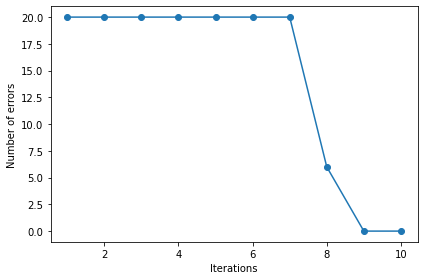

Text(0.5, 0, 'Iteration')

Text(0, 0.5, 'Loss')

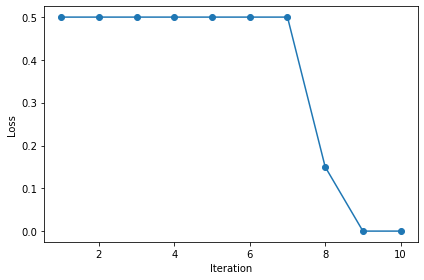

Test results:
Input              Predicted value    Actual value
---------------  -----------------  --------------
[1 1 1 0 1 0 1]                  1               1
[1 0 1 0 1 0 1]                  0               0
[1 1 1 0 1 1 0]                  1               1
[1 0 1 0 1 1 0]                  0               0
[1 1 1 0 1 1 1]                  1               1
[1 0 1 0 1 1 1]                  0               0
[1 1 1 1 0 0 0]                  1               1
[1 0 1 1 0 0 0]                  0               0
[1 1 1 1 0 0 1]                  1               1
[1 0 1 1 0 0 1]                  0               0
[1 1 1 1 0 1 0]                  1               1
[1 0 1 1 0 1 0]                  0               0


In [27]:
# Init the perceptron
ppn = Perceptron(lr=0.1, iters=10)  # Step function as default
 
# Training with X_traing and y_train
ppn.train(X_train, y_train)

# Plotting number of errors per iteration
plt.plot(range(1, ppn.iters + 1), ppn.train_errors, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Number of errors')
plt.tight_layout()
plt.show()

# Plotting loss per iteration
plt.plot(range(1, ppn.iters + 1), ppn.loss, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.tight_layout()
plt.show() 


# Testing
X_test = np.array([[1,1,1,0,1,0,1],[1,0,1,0,1,0,1],[1,1,1,0,1,1,0],[1,0,1,0,1,1,0],
                         [1,1,1,0,1,1,1],[1,0,1,0,1,1,1],[1,1,1,1,0,0,0],[1,0,1,1,0,0,0],
                         [1,1,1,1,0,0,1],[1,0,1,1,0,0,1],[1,1,1,1,0,1,0],[1,0,1,1,0,1,0]])

y_test = np.array([[1,0,1,0,1,0,1,0,1,0,1,0]]).T

results = ppn.predict(X_test)
    
print("Test results:")
            
print(tabulate({
                "Input": X_test,
                "Predicted value": results,
                "Actual value": y_test
               }, headers="keys"))   

### <font color="#ec1a1b">>>> Activité 2.1 </font>
---

Apportez les modifications nécessaires au code de perceptron précédent, de sorte que la fonction d'activation sigmoïde soit utilisée.

---
## <font color="red">3 | CLASSIFICATEUR PERCEPTRON</font> POUR LE _DATASET_ MNIST
---

Les chiffres [MNIST](http://yann.lecun.com/exdb/mnist/) sont un excellent ensemble de données pour commencer à explorer la reconnaissance d’image.

Dans ce tuto on vas essayer de classer les chiffres manuscrits à l'aide d'un classifieur perceptron à couche unique. Ce n’est certainement pas la manière la plus précise de procéder, mais cela nous donne un très bon point de départ pour explorer des méthodes plus complexes (notamment des réseaux de neurones plus profonds).

### <font color="red">3.1 - L'ensemble</font> MNIST
---
Dans ce tuto, nous utiliserons l'ensemble de données **MNIST**, qui est un ensemble de 70 000 petites images de chiffres (28x28 pixels) écrits à la main par des lycéens et des employés du US Census Bureau. Chaque image est étiquetée avec le chiffre qu'elle représente.

Il y a quatre fichiers disponibles sur le [site](http://yann.lecun.com/exdb/mnist/). Ces fichiers sont stockés au format IDX. [Ici](https://medium.com/@mannasiladittya/converting-mnist-data-in-idx-format-to-python-numpy-array-5cb9126f99f1) vous pouvez en apprendre plus sur ce format :

* **Training set images** : train-images-idx3-ubyte
* **Training set labels** : train-labels-idx1-ubyte
* **Test set images** : t10k-images-idx3-ubyte
* **Test set labels**: t10k-labels-idx1-ubyte

Dans le code suivant, nous obtenons le jeu de données à partir des fichiers.

In [12]:
training_images = idx2numpy.convert_from_file('data/train-images.idx3-ubyte')
training_labels = idx2numpy.convert_from_file('data/train-labels.idx1-ubyte')
test_images = idx2numpy.convert_from_file('data/t10k-images.idx3-ubyte')
test_labels = idx2numpy.convert_from_file('data/t10k-labels.idx1-ubyte')

Pour tracer l'image, nous utilisons `matplotlib`. Notez que les images sont stockées en tant qu'une matrice de pixels (28x28).

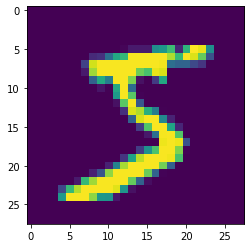

In [13]:
plt.imshow(training_images[0])

### <font color="red">3.2 - L'algorithme</font> du perceptron
---

Pour une perceptron binaire *feed forward*, dans n'importe quel exemple, nous prenons chacune de nos dimensions et nous le multiplions par un poids prédeterminé.

Commençons par créer une matrice de poids aléatoires. Comme les images font 28x28 pixels, chaque point de données a 784 dimensions; nous aurons besoin de 784 poids séparés pour chacun des chiffres (10).

Donc, `w` es une variable de poids de dimension 10 x 784 où chaque ligne de 1 x 784 est une entrée pour un seul perceptron pour un exemple d'entraînement  donné.

In [25]:
# Set all weights to a random value 0-1
w = np.random.uniform(-1,1,size=(10,784))

(10, 784)

Donc, nous devons multiplier chaque dimension pour le poids correspondant, puis nous additionnons les résultats. Si la totalité est supérieure à un seuil (threshold), nous classons l'exemple comme positif ; sinon négatif.

Pour une prédiction *feed forward*, nous pourrions utiliser une boucle, mais celle-ci serait terriblement lente. `Numpy` nous permet de faire cela comme une multiplication matricielle (`np.dot` ou `np.matmul`), ce qui sera beaucoup plus rapide :

Maintenant l'entraînement de notre neurone. L'algorithme du perceptron est assez simple :

1. Pour chaque donnée individuelle, déterminez si le poids classifie les données correctement ou incorrectement.

2. S'il est correct, ne faites rien et passez à la donnée suivante

3. Si la prédiction est incorrecte, tournez le plan de notre classificateur de manière incrémentielle vers la réponse correcte.

4. Répétez l'opération pour tous les points de données et jusqu'à ce que nous ayons un classificateur suffisamment acceptable.

La fonction `train` est appelée pour entraîner les perceptrons et pour la mise à jour du poids (`u_function`). 

La première boucle `for` dans `train` sert à calculer le nombre maximal `score`, c'est-à-dire la prédiction d'un seul exemple d'apprentissage pour un groupe de 10 perceptrons. La deuxième boucle for interne effectue la mise à jour du poids pour tous les perceptrons.

In [15]:
# Weight update: This method find the target at each input
def u_function(M):
    i = 0
    # The empty() function is used to create a new array of given shape and type, 
    # without initializing entries.
    u = np.empty([10,1])
    
    for val in M:
        if val >= 0:
            u[i] = 1.0
        else:
            u[i] = 0.0
        i += 1
    return u

In [16]:
def train(W, n, eta, epsilon, training_images, training_labels):
    """
    This method train the perceptron and update weight array.

    Paremeters:
    -----------
    W : Values for the weights
    n : Number of occurrences in the dataset to use (batch)
    eta : Learning rate
    epsilon: Number of prediction mistakes
    training_images: Input features
    training_labels: Input labels
    """
    epoch = 0
    train_errors = []
    
    while(True):
        train_errors.append(0)
        
        for i in range(n):  
            xi = training_images[i]
            xi.resize(784, 1)
            
            # Compute activation for the example xi
            score = np.dot(W,xi)
            
            best_label = score.argmax(axis=0)
            
            if(best_label != training_labels[i]):
                train_errors[epoch] = train_errors[epoch] + 1
                
        epoch = epoch + 1    
        
        # loop to update the weights
        for i in range(n):
            xi = training_images[i]
            xi.resize(784, 1)
            
            u = np.array(u_function(np.dot(W,xi)))
            
            dxi = np.zeros((1,10)).T
            dxi[training_labels[i]] = 1
            dxi_minus_u = np.subtract(dxi, u)
            
            p = np.multiply(dxi_minus_u, np.transpose(xi))
            W = W + eta * p
            
        # while loop terminates when algorithm converges or when number of epoch is 100
        # when training data is quite high, eta is 1 and epsilon is 0 then
        # there are high chances of algorithm not getting converged
        # making while loop run infinitely, so max. epochs is set to 100
        if(train_errors[epoch - 1]/n <= epsilon or epoch==100):
            break
    return W, train_errors

Ensuite, la précision est calculée en tant que moyenne de correction en comparant entre l'étiquette prédite et l'étiquette vraie.

In [17]:
def test(W, test_images, test_labels):
    test_errors = 0  
    predictions = []
    
    for i in range(len(test_images)):  
        xi = test_images[i]
        xi.resize(784, 1)
        score = np.dot(W ,xi)        
        best_label = score.argmax(axis=0)
        predictions.append(best_label[0])
        
        if(best_label != test_labels[i]):
            test_errors = test_errors + 1
    
    print('Error Count on Test data:',test_errors)
    print('Error Percentage:', test_errors*100/len(test_images))
    
    return predictions

### <font color="red">3.3 - Fonctions</font> utilitaires
---

In [18]:
def tabulate_prediction_results(predictions, test_labels):               
    print(tabulate({
                    "Predicted value": predictions,
                    "Actual value": test_labels
                   }, headers="keys"))    

In [19]:
def plot_graph(train_errors):
    plt.title('\nepoch number VS number of misclassification (Train Errors)\n')
    plt.ylabel('\nnumber of misclassification (Train Errors)\n')
    plt.xlabel('\nepoch number\n')
    plt.plot(range(len(train_errors)), train_errors, color = 'b')
    plt.show()

In [20]:
def compare_and_plot_graphs(train_errors_1, train_errors_2, train_errors_3):
    plt.subplot(1, 3, 1)
    plt.plot(range(len(train_errors_1)), train_errors_1)
    plt.xlabel('\nepoch number\n (for W1)\n',fontsize=18)
    plt.ylabel('\nnumber of misclassifications\n',fontsize=18)

    plt.subplot(1, 3, 2)
    plt.plot(range(len(train_errors_2)), train_errors_2)
    plt.xlabel('\nepoch number\n (for W2)\n',fontsize=18)
    plt.ylabel('\nnumber of misclassifications\n',fontsize=18)


    plt.subplot(1, 3, 3)
    plt.plot(range(len(train_errors_3)), train_errors_3)
    plt.xlabel('\nepoch number\n (for W3)\n',fontsize=18)
    plt.ylabel('\nnumber of misclassifications\n',fontsize=18)

    plt.tight_layout(rect=[0, 0, 5, 2])
    plt.show()

### <font color="red">3.4 - Comparaison de</font> résultats
---

**Résultats lorsque n = 50, eta = 1 et epsilon = 0 ci-dessous :**

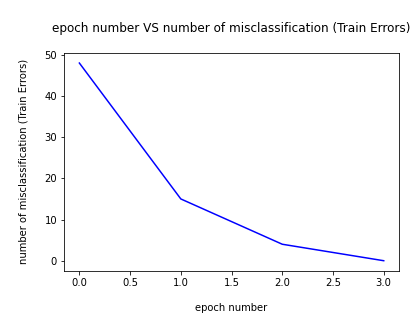

Error Count on Test data: 4395
Error Percentage: 43.95
  Predicted value    Actual value
-----------------  --------------
                7               7
                1               2
                1               1
                0               0
                4               4
                1               1
                9               4
                6               9
                1               5
                9               9
                0               0
                8               6
                9               9
                0               0
                1               1
                2               5
                8               9
                0               7
                6               3
                4               4
                9               9
                6               6
                6               6
                6               5
                4               4
                0          

In [21]:
n = 50
eta = 1
epsilon = 0.0
W, train_errors = train(w, n, eta, epsilon, training_images, training_labels)
plot_graph(train_errors)
predictions = test(W, test_images, test_labels)
tabulate_prediction_results(predictions, test_labels)

Le pourcentage d'erreur est de 41,78 sur les images de test lorsque n = 50. Le pourcentage d'erreur est assez élevé pour les images de test car le réseau a été formé sur un petit ensemble de 50 images de formation qui ont convergé sur 4 périodes et aucune erreur de formation.

**Résultats lorsque n = 1000, eta = 1 et epsilon = 0 ci-dessous :**

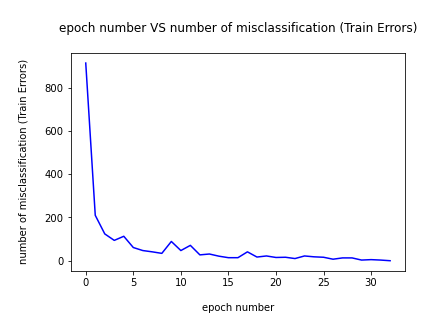

Error Count on Test data: 1751
Error Percentage: 17.51
  Predicted value    Actual value
-----------------  --------------
                7               7
                6               2
                1               1
                0               0
                4               4
                1               1
                4               4
                9               9
                1               5
                9               9
                0               0
                6               6
                9               9
                0               0
                1               1
                5               5
                9               9
                7               7
                3               3
                4               4
                9               9
                6               6
                4               6
                5               5
                4               4
                0          

In [22]:
n = 1000
eta = 1
epsilon = 0.0
W, train_errors = train(w, n, eta, epsilon, training_images, training_labels)
plot_graph(train_errors)
predictions = test(W, test_images, test_labels)
tabulate_prediction_results(predictions, test_labels)

Le pourcentage d'erreur est de 18,27 sur les images de test lorsque n = 1 000. Le pourcentage d'erreur a été réduit dans une large mesure par rapport à ce qui avait été obtenu lorsque n était égal à 50. Cela est dû au fait que le réseau a appris un plus grand nombre d'échantillons d'apprentissage et a été utilisé dans 36 époques sans erreur d'apprentissage. Bien que 1 000 échantillons ne soient également pas suffisants, le taux d'erreur sur les images testées est d'environ 18%.

**Résultats lorsque n = 60000, eta = 1 et epsilon = 0 ci-dessous :**

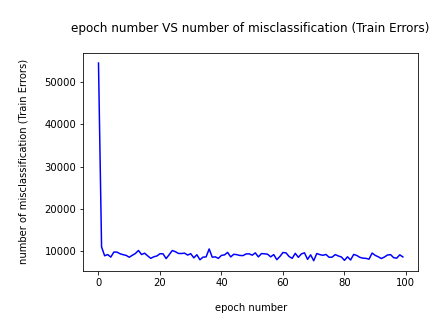

Error Count on Test data: 1563
Error Percentage: 15.63
  Predicted value    Actual value
-----------------  --------------
                7               7
                2               2
                1               1
                0               0
                9               4
                1               1
                4               4
                9               9
                6               5
                9               9
                0               0
                6               6
                9               9
                0               0
                1               1
                5               5
                9               9
                7               7
                3               3
                4               4
                9               9
                6               6
                6               6
                5               5
                4               4
                0          

In [23]:
n = 60000
eta = 1
epsilon = 0.0
W, train_errors = train(w, n, eta, epsilon, training_images, training_labels)
plot_graph(train_errors)
predictions = test(W, test_images, test_labels)
tabulate_prediction_results(predictions, test_labels)

Le pourcentage d'erreur est de 15,09 sur les images de test lorsque n = 60000. Le pourcentage d'erreur a été réduit de manière négligeable d'environ 18% à environ 15%, mais cet objectif a été atteint lorsque le nombre d'époques a atteint 100 et que de plus, il n'y avait aucun espoir que l'algorithme converge. On peut déduire du graphique que le nombre d'erreurs de classification est d'environ 6000 à 12000 après la 1ère époque ou, en d'autres termes, que le pourcentage d'erreur sur les images d'entraînement est proche de 15% dans toutes les périodes supérieures à 1.

**Résultats lorsque n = 60000, eta = 1, epsilon = 0,15 et trois poids différents attribués de manière aléatoire pour trois exécutions :**

In [ ]:
### considering three different weights as w1, w2 and w3 for three different runs
w1 = np.random.uniform(-1,1,size=(10,784))
w2 = np.random.uniform(-1,1,size=(10,784))
w3 = np.random.uniform(-1,1,size=(10,784))

n = 60000
eta = 1
epsilon = 0.15

W1, train_errors_1 = train(w1, n, eta, epsilon, training_images, training_labels)
W2, train_errors_2 = train(w2, n, eta, epsilon, training_images, training_labels)
W3, train_errors_3 = train(w3, n, eta, epsilon, training_images, training_labels)

print ("\n***Below are the graphs obtained on training data***")
compare_and_plot_graphs(train_errors_1, train_errors_2, train_errors_3)

print ("\n***Below are the results obtained on test data***")
print ("\nRun #1 - When w1 was initial weights for training")
predictions = test(W1, test_images, test_labels)

print ("\nRun #2 - When w2 was initial weights for training")
predictions = test(W2, test_images, test_labels)

print ("\nRun #3 - When w3 was initial weights for training")
predictions = test(W3, test_images, test_labels)

Le pourcentage d'erreur est de 16,42, 15,94 et 16,97 sur les images de test pour n = 60000, eta= 1, epsilon = 0,15 et lorsque l'algorithme a été exécuté trois fois avec 3 poids initiaux différents.

Il a donc été observé que le choix de eta et epsilon convenait que l’algorithme converge en un nombre fini d’époques, même pour 60 000 images de test, quel que soit le nombre de fois où l’algorithme est exécuté avec différentes pondérations initiales attribuées de manière aléatoire (3, 5 et 3 dans ce cas pour W1, W2 et W3 respectivement). 

De plus, il est à noter que le pourcentage d'erreur sur les images de test oscille autour de 15% à 18% dans tous les cas sauf le cas où les images de test étaient à 50.

---
## <font color="red">ACTIVITÉ DE</font> RÉCAPITULATION
### Perceptron: Classification des marqueurs Cozmo
---
Sur la base de la formation des deux sections précédentes, vous allez maintenant créer un programme de perceptron similaire, mais pour essayer de classer les marqueurs de Cozmo.

1. La première chose à faire est de créer une base de données à partir du dossier `Markers` situé dans le dossier `data` de ce tuto.

    * Vous devez générer, pour chaque marqueur, au moins 100 images supplémentaires à l'aide de Augmentor. Vous devez utiliser dans votre pipeline Augmentor toutes les opérations disponibles pour obtenir un ensemble d'images aussi varié que possible.
    
    * Vous pouvez utiliser une autre bibliothèque d'augmentation telle que [imgaug](https://github.com/aleju/imgaug) pour obtenir un ensemble encore plus varié.
    
    
2. Une fois que vous avez votre ensemble de données, vous allez créer un perceptron multi-classe (comme celui de la section "Classificateur perceptron pour le dataset MNITS") avec une **fonction d'activation différente de sigmoïde ou _step_** pour essayer de classer les marqueurs. Pensez à réduire vos images à une dimension de 28x28 px. Vous pouvez diviser votre ensemble de données en utilisant 80% pour la formation et 20% pour le test.


3. Exécutez plusieurs tests de votre algorithme en faisant varier les paramètres d’entraînement, comme dans la section 3.4.